# Implementación de K-means Clustering
##Vinculo al Colab: https://colab.research.google.com/drive/1z85BKcDj4n1WeS0UVNYmPXoRqBzTkdov?usp=sharing
## 1.1 Fundamentos de la técnica

**K-means** es un algoritmo de aprendizaje no supervisado utilizado para agrupar datos en clusters. Su objetivo principal es particionar un conjunto de datos en K grupos (clusters) donde cada punto de datos pertenece al cluster cuyo centroide (media) es más cercano.

**Características principales:**
- Algoritmo iterativo que minimiza la varianza intra-cluster
- No supervisado (no requiere etiquetas)
- Sensible a la inicialización de centroides
- Requiere especificar el número K de clusters
- Eficiente para conjuntos de datos grandes

## 1.2 Modelo Matemático

**Función objetivo:** Minimizar la suma de distancias cuadradas entre los puntos y sus centroides asignados

$$ J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2 $$

Donde:
- $K$: Número de clusters
- $C_i$: Conjunto de puntos en el cluster i
- $\mu_i$: Centroide del cluster i
- $x$: Punto de datos

Algoritmo:
1. Inicializar K centroides aleatoriamente
2. **Asignación:** Asignar cada punto al cluster del centroide más cercano
3. **Actualización:** Recalcular centroides como la media de los puntos asignados
4. Repetir pasos 2-3 hasta convergencia

## 1.3 Librerías y Funciones

## **sklearn.cluster**

- `KMeans()` - Crea y configura un modelo de clustering K-means

- `fit()` - Entrena el modelo K-means con los datos proporcionados

- `fit_predict()` - Entrena el modelo y devuelve las etiquetas de cluster en un solo paso

- `predict()` - Asigna clusters a nuevos datos usando el modelo entrenado

## **sklearn.datasets**

- `make_blobs()` - Genera datasets sintéticos con clusters Gaussianos para pruebas

## **sklearn.preprocessing**

- `StandardScaler()` - Crea un objeto para estandarización de datos

- `fit_transform()` - Ajusta el escalador a los datos y los transforma

- `transform()` - Aplica la transformación a nuevos datos usando el escalador ajustado

- `inverse_transform()` - Revierte la transformación escalando datos a valores originales

## **sklearn.metrics**

- `confusion_matrix()` - Calcula la matriz de confusión entre valores reales y predichos

- `accuracy_score()` - Calcula la precisión de clasificación

- `silhouette_score()` - Evalúa la calidad del clustering mediante coeficiente de silueta

- `adjusted_rand_score()` - Mide la similitud entre dos agrupamientos de datos

## **pandas**

- `DataFrame()` - Crea una estructura de datos tabular con columnas etiquetadas

- `describe()` - Genera estadísticas descriptivas resumidas del DataFrame

## **matplotlib.pyplot**

- `scatter()` - Crea un gráfico de dispersión para visualizar datos

- `subplot()` - Divide la figura en subgráficos para múltiples visualizaciones

- `show()` - Muestra la figura actual con todos los gráficos

- `figure()` - Crea una nueva figura para plotting

- `title()` - Establece el título del gráfico actual

- `xlabel()` - Establece la etiqueta del eje X

- `ylabel()` - Establece la etiqueta del eje Y

- `grid()` - Activa/desactiva la cuadrícula en el gráfico

- `colorbar()` - Añade una barra de colores al gráfico

- `legend()` - Muestra la leyenda del gráfico

- `tight_layout()` - Ajusta automáticamente los parámetros del subgráfico

- `plot()` - Crea un gráfico de líneas

- `xticks()` - Establece las marcas y etiquetas del eje X

## **seaborn**

- `heatmap()` - Crea una visualización de matriz como mapa de calor

- `set_palette()` - Establece la paleta de colores para los gráficos

## **scipy.stats**

- `mode()` - Calcula la moda (valor más frecuente) de un array

## **numpy**

- `array()` - Convierte datos a un array numpy

- `reshape()` - Cambia la forma de un array sin modificar sus datos

- `unique()` - Encuentra los elementos únicos en un array

- `zeros_like()` - Crea un array de ceros con la misma forma que el array de entrada

- `random.seed()` - Fija la semilla para reproducibilidad en generación aleatoria

- `mean()` - Calcula la media aritmética a lo largo del eje especificado

- `std()` - Calcula la desviación estándar a lo largo del eje especificado

- `min()` - Retorna el valor mínimo del array

- `max()` - Retorna el valor máximo del array

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")

## 1.4 Pipeline de K-means
### Preprocesamiento y Análisis Exploratorio

In [3]:
# Generar dataset de ejemplo
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2,
                       cluster_std=0.8, random_state=42)

# Crear DataFrame para mejor visualización
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['True_Label'] = y_true

print("Dataset generado:")
print(f"Forma del dataset: {X.shape}")
print(f"Número de clusters reales: {len(np.unique(y_true))}")

Dataset generado:
Forma del dataset: (300, 2)
Número de clusters reales: 3


In [4]:
# Análisis estadístico básico
print("Análisis Estadístico del Dataset:")
print(df.describe())

print(f"\nInformación adicional:")
print(f"Media Feature_1: {df['Feature_1'].mean():.2f}")
print(f"Desviación estándar Feature_1: {df['Feature_1'].std():.2f}")
print(f"Media Feature_2: {df['Feature_2'].mean():.2f}")
print(f"Desviación estándar Feature_2: {df['Feature_2'].std():.2f}")
print(f"Mínimo Feature_1: {df['Feature_1'].min():.2f}")
print(f"Máximo Feature_1: {df['Feature_1'].max():.2f}")

Análisis Estadístico del Dataset:
        Feature_1   Feature_2  True_Label
count  300.000000  300.000000  300.000000
mean    -1.588597    1.359204    1.000000
std      4.864861    6.604991    0.817861
min     -8.856943   -8.721647    0.000000
25%     -6.369915   -6.425157    0.000000
50%     -2.537413    1.982300    1.000000
75%      4.078339    8.439509    2.000000
max      6.491606   11.190421    2.000000

Información adicional:
Media Feature_1: -1.59
Desviación estándar Feature_1: 4.86
Media Feature_2: 1.36
Desviación estándar Feature_2: 6.60
Mínimo Feature_1: -8.86
Máximo Feature_1: 6.49


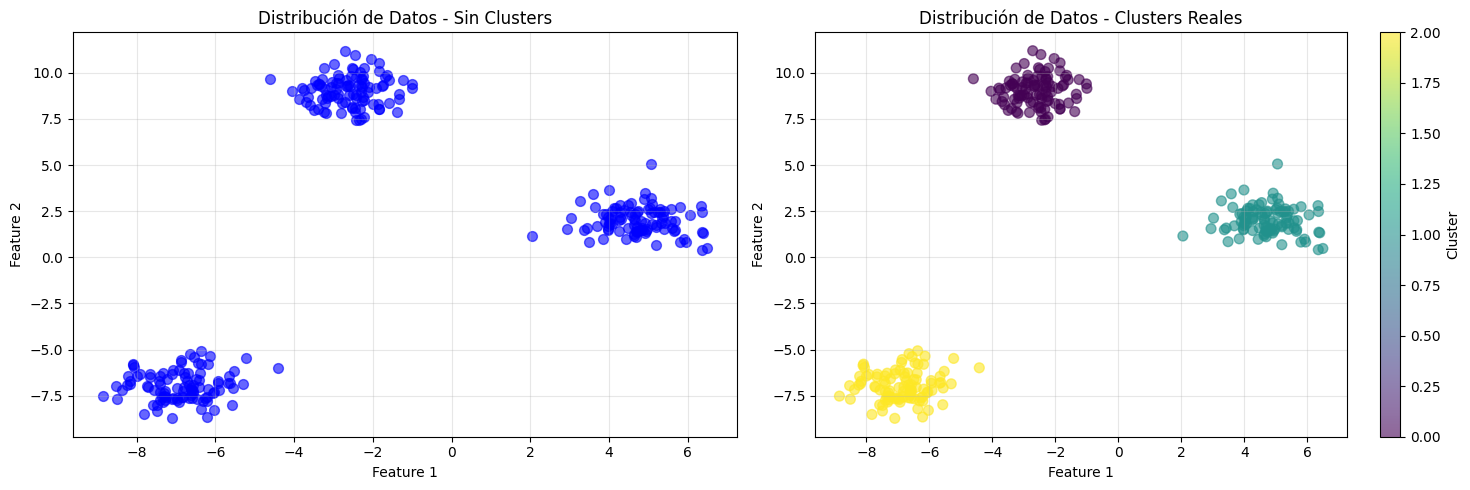

In [5]:
# Gráfico de dispersión - Datos originales
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Feature_1'], df['Feature_2'], c='blue', alpha=0.6, s=50)
plt.title('Distribución de Datos - Sin Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['True_Label'],
            cmap='viridis', alpha=0.6, s=50)
plt.title('Distribución de Datos - Clusters Reales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Entrenamiento del Modelo K-means

In [6]:
# Preprocesamiento - Estandarización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Agregar predicciones al DataFrame
df['Predicted_Label'] = y_pred

print("Modelo K-means entrenado exitosamente")
print(f"Centroides encontrados: {kmeans.cluster_centers_.shape}")
print(f"Número de iteraciones: {kmeans.n_iter_}")

Modelo K-means entrenado exitosamente
Centroides encontrados: (3, 2)
Número de iteraciones: 2


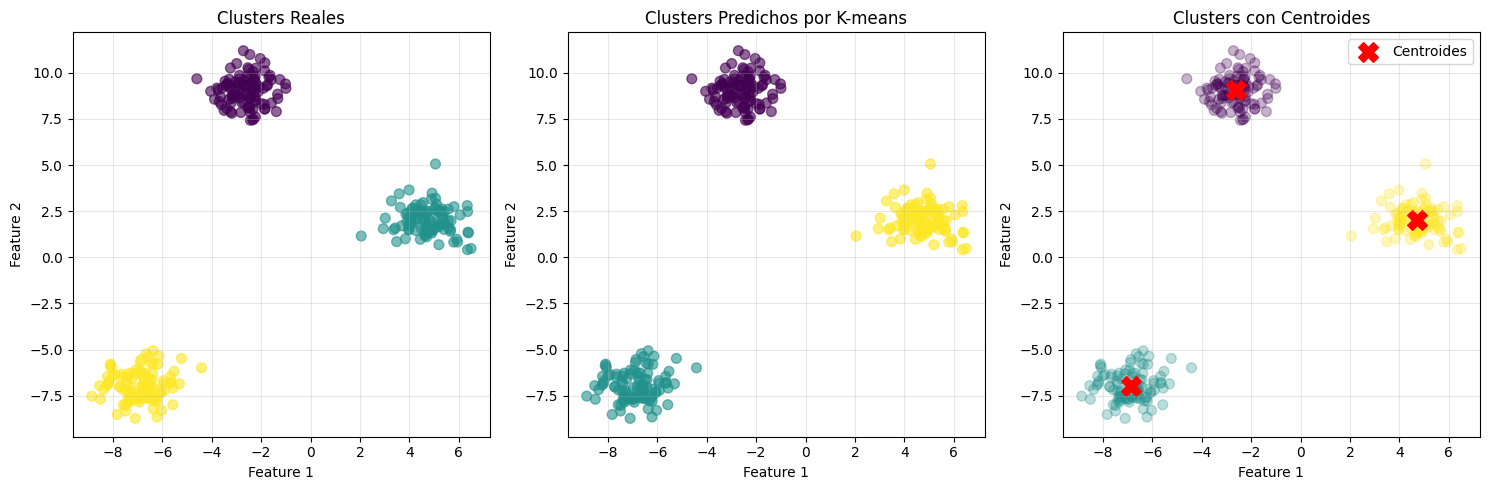

In [7]:
# Visualización de resultados del clustering
plt.figure(figsize=(15, 5))

# Datos originales con clusters reales
plt.subplot(1, 3, 1)
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['True_Label'],
            cmap='viridis', alpha=0.6, s=50)
plt.title('Clusters Reales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Datos con clusters predichos
plt.subplot(1, 3, 2)
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Predicted_Label'],
            cmap='viridis', alpha=0.6, s=50)
plt.title('Clusters Predichos por K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Centroides
plt.subplot(1, 3, 3)
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Predicted_Label'],
            cmap='viridis', alpha=0.3, s=50)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters con Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Función de Predicción

In [8]:
def predecir_cluster(modelo, scaler, nuevo_patron):
    """
    Función para predecir el cluster de un nuevo patrón

    Parámetros:
    - modelo: Modelo K-means entrenado
    - scaler: Scaler utilizado para preprocesamiento
    - nuevo_patron: Array o lista con las características del nuevo patrón

    Retorna:
    - cluster_predicho: Número del cluster asignado
    """
    # Convertir a array numpy si es necesario
    nuevo_patron = np.array(nuevo_patron).reshape(1, -1)

    # Estandarizar el nuevo patrón
    nuevo_patron_scaled = scaler.transform(nuevo_patron)

    # Predecir el cluster
    cluster_predicho = modelo.predict(nuevo_patron_scaled)

    return cluster_predicho[0]

In [9]:
# Probar la función de predicción con ejemplos
print("Probando función de predicción:")

# Ejemplo 1
ejemplo_1 = [2.0, 1.0]
cluster_1 = predecir_cluster(kmeans, scaler, ejemplo_1)
print(f"Patrón {ejemplo_1} → Cluster predicho: {cluster_1}")

# Ejemplo 2
ejemplo_2 = [-2.0, -3.0]
cluster_2 = predecir_cluster(kmeans, scaler, ejemplo_2)
print(f"Patrón {ejemplo_2} → Cluster predicho: {cluster_2}")

# Ejemplo 3
ejemplo_3 = [0.5, 4.0]
cluster_3 = predecir_cluster(kmeans, scaler, ejemplo_3)
print(f"Patrón {ejemplo_3} → Cluster predicho: {cluster_3}")

Probando función de predicción:
Patrón [2.0, 1.0] → Cluster predicho: 2
Patrón [-2.0, -3.0] → Cluster predicho: 1
Patrón [0.5, 4.0] → Cluster predicho: 2


### Evaluación del Modelo

In [10]:
# Métricas de evaluación
print("Evaluación del Modelo K-means")

# Nota: En clustering no supervisado, las etiquetas pueden estar permutadas
# Necesitamos mapear las etiquetas para una comparación correcta
from scipy.stats import mode

# Mapear etiquetas predichas a las reales para la matriz de confusión
labels = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    labels[mask] = mode(y_true[mask])[0]

Evaluación del Modelo K-means



🔍 Matriz de Confusión:


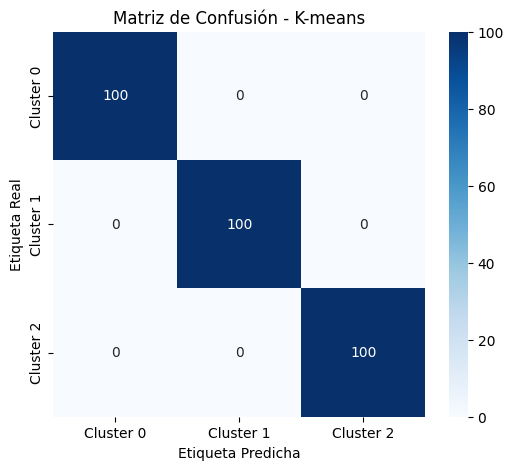

In [11]:
# Matriz de confusión
print("\n🔍 Matriz de Confusión:")
cm = confusion_matrix(y_true, labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Matriz de Confusión - K-means')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [14]:
# Accuracy
accuracy = accuracy_score(y_true, labels)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Métricas adicionales
from sklearn.metrics import silhouette_score, adjusted_rand_score

silhouette = silhouette_score(X_scaled, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Accuracy: 1.0000 (100.00%)
Silhouette Score: 0.8783
Adjusted Rand Index: 1.0000


### Interpretación de Resultados
**Matriz de Confusión:** Muestra cómo se asignaron los clusters predichos vs los reales. Los valores en la diagonal principal representan clasificaciones correctas.

**Accuracy:** Porcentaje de muestras clasificadas correctamente. En este ejemplo debería ser alto ya que los datos son bien separables.

**Silhouette Score:** Mide qué tan bien separados están los clusters. Valores cercanos a 1 indican clusters bien definidos.

**Adjusted Rand Index:** Mide la similitud entre las asignaciones reales y predichas, ajustado por chance.

Determinando el número óptimo de clusters (Método del Codo)


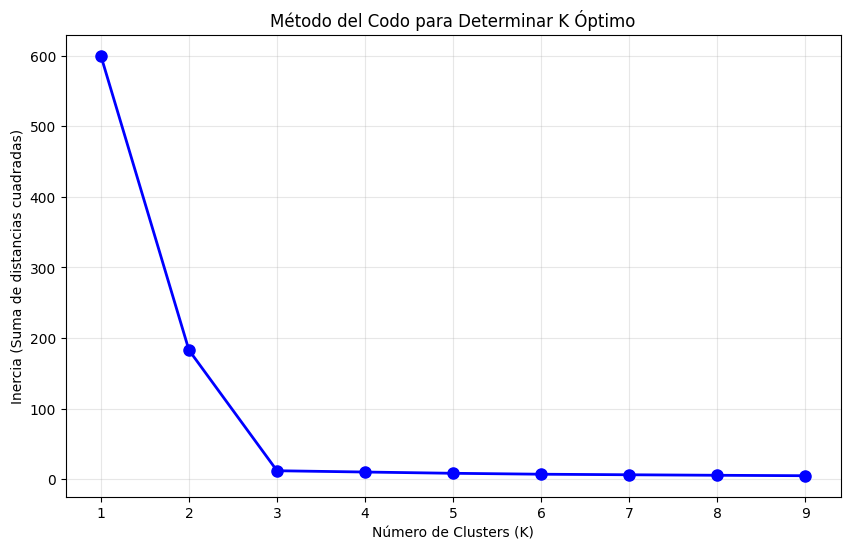

In [13]:
# Método del codo para determinar K óptimo
print("Determinando el número óptimo de clusters (Método del Codo)")

inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia (Suma de distancias cuadradas)')
plt.title('Método del Codo para Determinar K Óptimo')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()


## 3. Fuentes de información

1. scikit-learn developers. (2023). *sklearn.cluster.KMeans*. Scikit-learn Documentation. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The elements of statistical learning: Data mining, inference, and prediction* (2nd ed.). Springer-Verlag.

3. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830.
4. MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. In L. Le Cam & J. Neyman (Eds.), *Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability* (Vol. 1, pp. 281-297). University of California Press.